In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
import pandas as pd
from rdkit import DataStructs
import collections
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Fingerprints import FingerprintMols
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table=pd.read_table('similarity.txt')
col_names = table.columns.tolist()
table['']=col_names
table.set_index('',inplace=True)
table

,TPCN02029,TPCN02063,TPCN02186,TPCN02187,TPCN02188,TPCN02189,TPCN02190,TPCN02191,TPCN02192,TPCN02193,...,TPCN06374,TPCN06375,TPCN06376,TPCN06377,TPCN06378,TPCN06379,TPCN06380,TPCN06381,TPCN06382,TPCN06383
,,,,,,,,,,,,,,,,,,,,,
TPCN02029,1.000000,0.972163,0.572414,0.348377,0.478571,0.325383,0.418496,0.409478,0.456083,0.527223,...,0.390117,0.451793,0.529120,0.529120,0.380795,0.567050,0.458976,0.401587,0.434008,0.617674
TPCN02063,0.972163,1.000000,0.569126,0.351837,0.482732,0.322742,0.426305,0.413462,0.461588,0.527256,...,0.382166,0.455118,0.522533,0.522533,0.379479,0.573864,0.457600,0.407698,0.434158,0.628229
TPCN02186,0.572414,0.569126,1.000000,0.407072,0.475552,0.324301,0.417219,0.410412,0.420620,0.558525,...,0.369898,0.453535,0.501818,0.501818,0.351613,0.494545,0.466667,0.418066,0.433521,0.461925
TPCN02187,0.348377,0.351837,0.407072,1.000000,0.517780,0.304702,0.450431,0.438735,0.385267,0.433790,...,0.474227,0.475820,0.560910,0.560910,0.441149,0.374549,0.454624,0.450000,0.431779,0.386189
TPCN02188,0.478571,0.482732,0.475552,0.517780,1.000000,0.340301,0.493489,0.481061,0.446203,0.598891,...,0.456258,0.537007,0.580482,0.580482,0.450931,0.490700,0.492308,0.499586,0.538071,0.480929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TPCN06379,0.567050,0.573864,0.494545,0.374549,0.490700,0.347698,0.353675,0.387268,0.377510,0.518182,...,0.449165,0.520370,0.595442,0.595442,0.425287,1.000000,0.492151,0.449726,0.454296,0.560561
TPCN06380,0.458976,0.457600,0.466667,0.454624,0.492308,0.355693,0.417450,0.448101,0.430045,0.388147,...,0.474790,0.607493,0.615385,0.615385,0.502279,0.492151,1.000000,0.667622,0.613825,0.558477
TPCN06381,0.401587,0.407698,0.418066,0.450000,0.499586,0.359206,0.438839,0.464146,0.403464,0.355187,...,0.478510,0.662289,0.606711,0.606711,0.569350,0.449726,0.667622,1.000000,0.805876,0.522994


### Heatmap

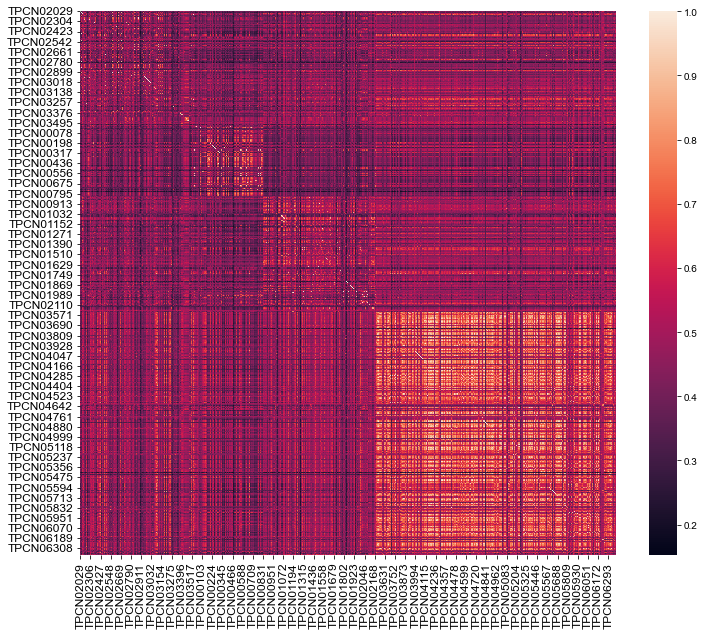

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(table)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.rcParams['font.sans-serif'] = 'Arial'
plt.savefig('heatmap.tif', dpi=600, bbox_inches='tight')
plt.savefig('heatmap.jpg', dpi=600, bbox_inches='tight')
plt.show()

### Cluster heatmap

D:\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


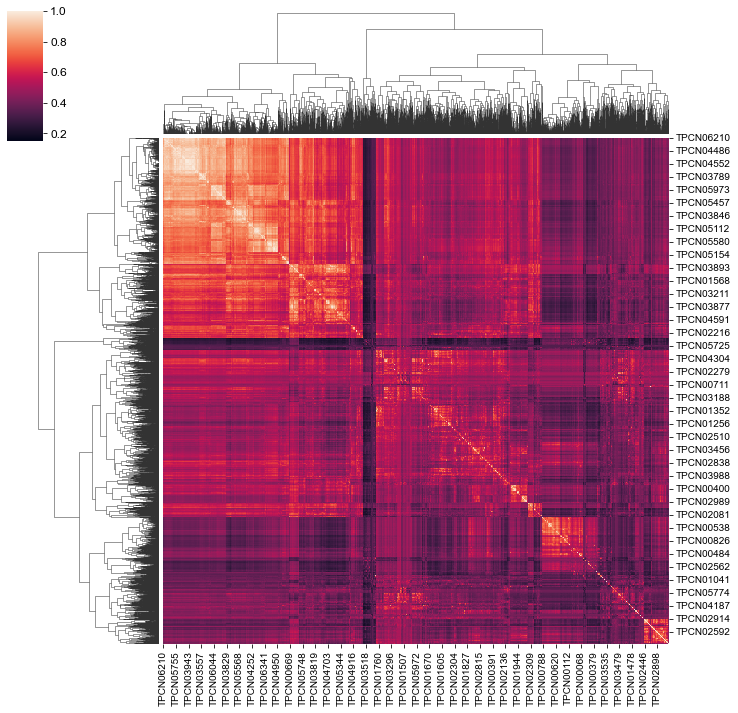

In [4]:
ax=sns.clustermap(table, cbar_pos=(-0.02, 0.8, 0.05, 0.18))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.rcParams['font.sans-serif'] = 'Arial'
plt.savefig('heatmap_cluster.tif', dpi=600, bbox_inches='tight')
plt.savefig('heatmap_cluster.jpg', dpi=600, bbox_inches='tight')
plt.show()